In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Part 1 - Exploratory data analysis

In [2]:
#Load data into dataframe
with open("logins.json", "r") as read_file:
    data = json.load(read_file)

df = pd.DataFrame(data['login_time'])

In [3]:
#Aggregate data into 15 minute intervals
df['count'] = 1
df.columns = ['time', 'count']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df.resample('15T').sum().replace(np.nan, 0)
df

,count
time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


In [4]:
df.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


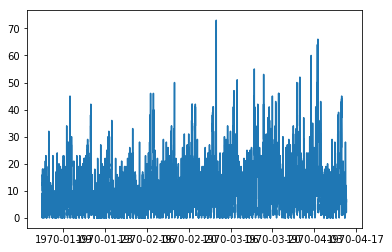

In [5]:
#Visualize logins
plt.plot(df['count'])
plt.show()

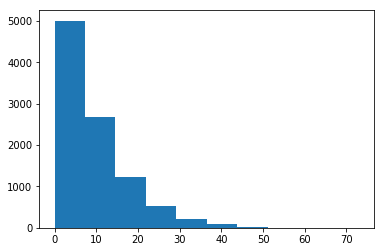

In [6]:
#Visualize logins in a histogram
plt.hist(df['count'])
plt.show()

We can see that although there are some extreme values (>50), these are probably periods of high activity rather than a result of mistyped values or erroneous data collection. 

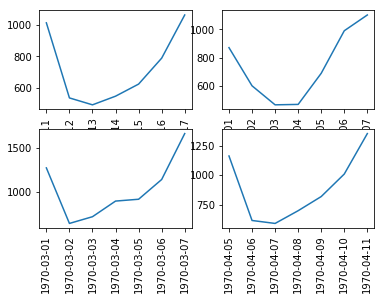

In [7]:
df_daily = df.resample('D').sum()

#Plot daily logins over the period of a week
plt.subplot(2, 2, 1)
plt.plot(df_daily['1970-01-11':'1970-01-17'])
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)
plt.plot(df_daily['1970-02-01':'1970-02-07'])
plt.xticks(rotation=90)
plt.subplot(2, 2, 3)
plt.plot(df_daily['1970-03-01':'1970-03-07'])
plt.xticks(rotation=90)
plt.subplot(2, 2, 4)
plt.plot(df_daily['1970-04-05':'1970-04-11'])
plt.xticks(rotation=90)
plt.show()

The plots above are the number of daily logins over the period of a week, from Sunday to Saturday. I picked the first week of every month in the data except for January, where I went with the second week. People are coming back from vacation, beginning a new year, and educational institutions are usually closed, so this might not be a representative week. However, there are also many reasons we might want to look at activity during unique times of the year, when it might be unusually high or low, or occuring at odd times. If we want to speak more generally, we can see that Sunday has a very high number of logins and Monday and Tuesday usually have the least, with the number climbing up throughout the week and peaking again on Saturday. 

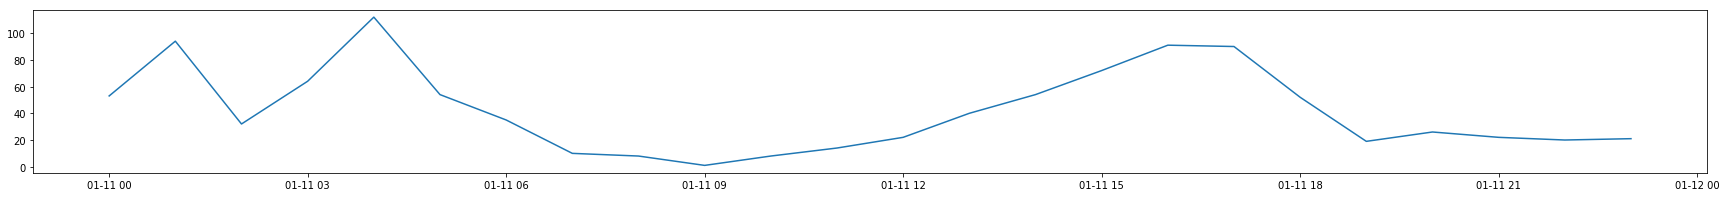

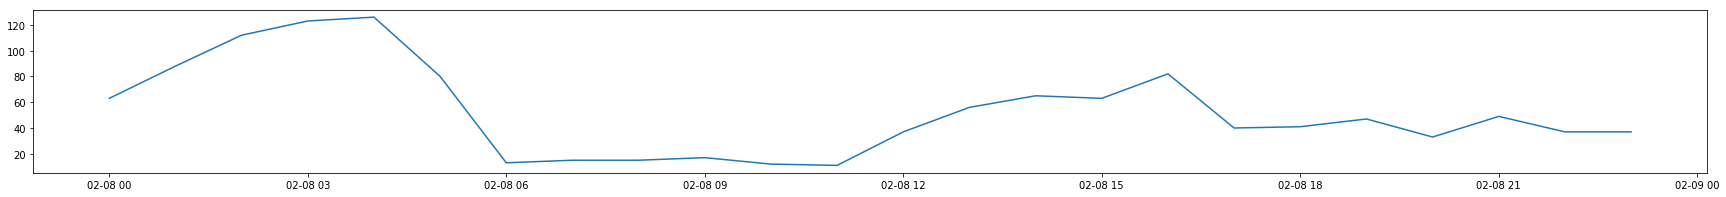

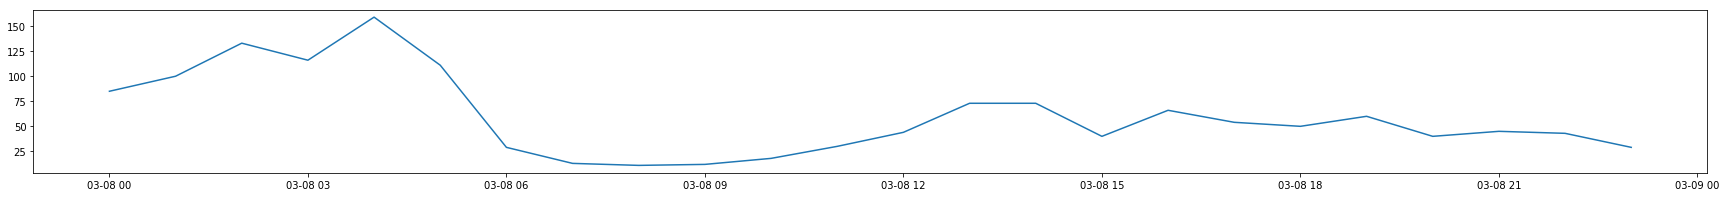

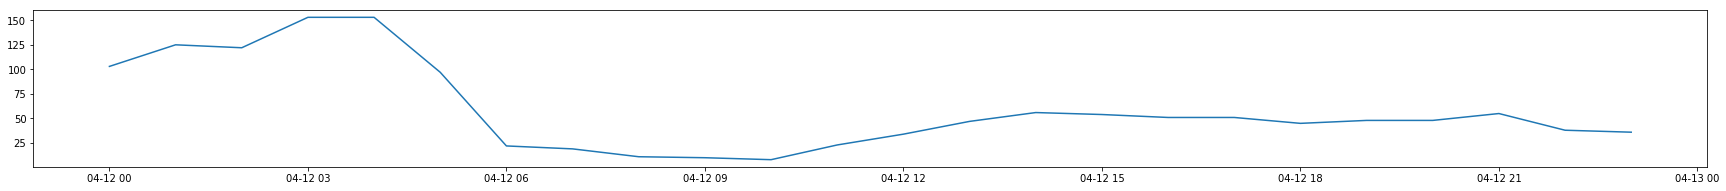

In [8]:
df_hourly = df.resample('H').sum()

#Plot hourly logins for second Sunday of the month
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-01-11'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-02-08'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-03-08'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-04-12'])
plt.subplots_adjust(top=0.85)
plt.show()

The plots above look at a 24-hour period for the second Sunday of each month. We see peak activity from midnight to 4 am, which is unusual. The time zone might not be calibrated according to the geographical location where the user data was collected. There is very little activity from 6 am to 10 am, with a slow and steady rise leveling off around 3 pm. 

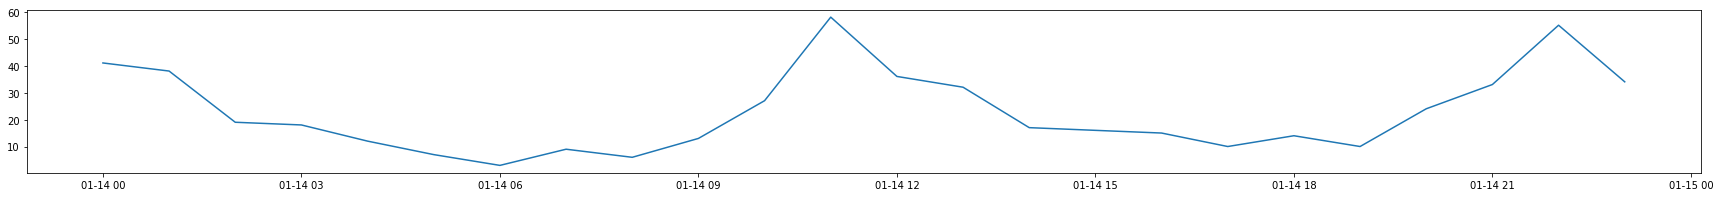

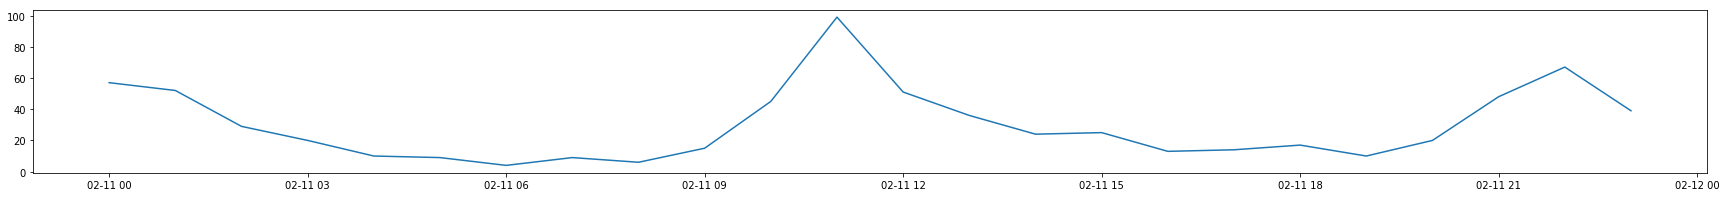

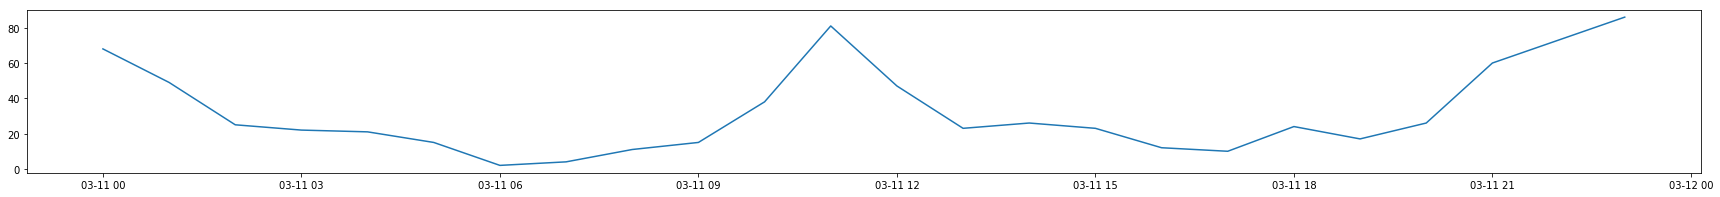

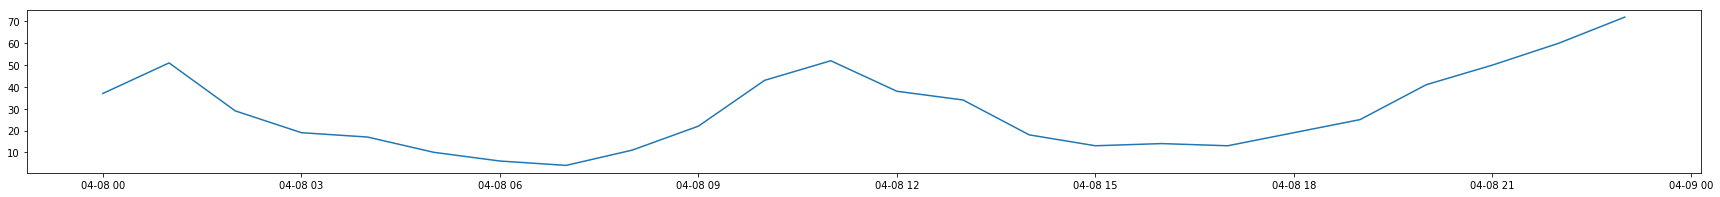

In [9]:
#Plot daily logins for second Wednesday of the month
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-01-14'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-02-11'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-03-11'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-04-08'])
plt.show()

On Wednesdays, which we assume to be representative of an average weekday, there seems to be a moderate to high level of activity around midnight which decreases until reaching a minimum around 6 am. It then rises gradually and peaks around 10 am, after which it falls steadily until around 5 pm and rises to a peak once again around 10/11 pm. 

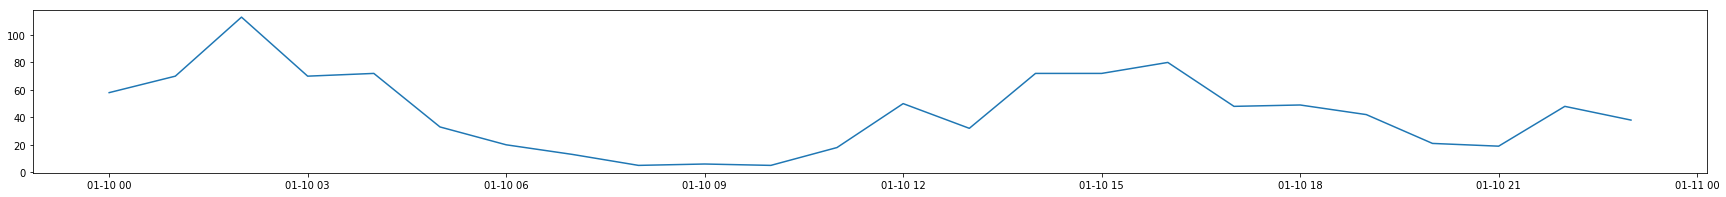

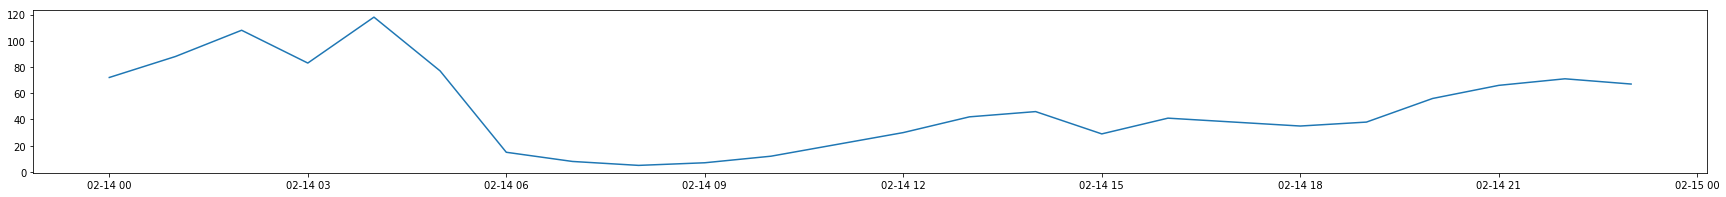

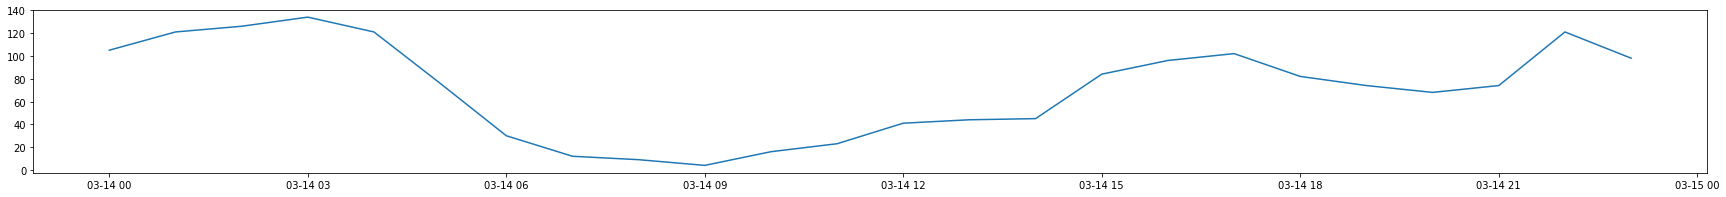

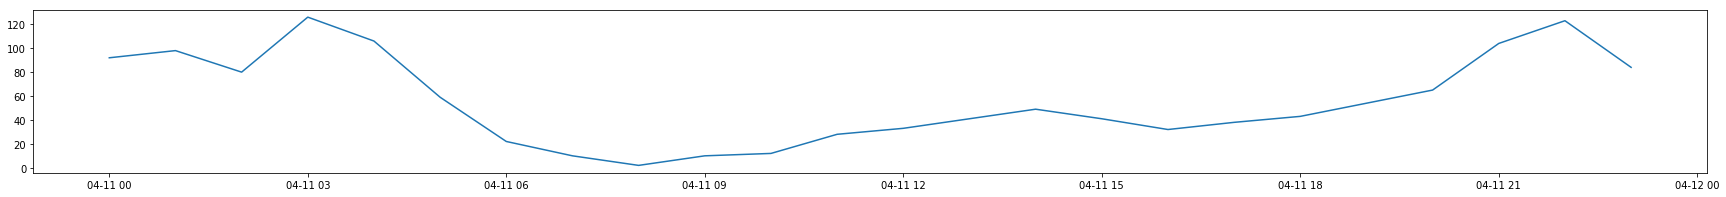

In [10]:
#Plot daily logins for second Saturday of the month
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-01-10'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-02-14'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-03-14'])
plt.show()
plt.figure(figsize=(30,3))
plt.plot(df_hourly['1970-04-11'])
plt.show()

On Saturdays we see peak activity early in the morning (midnight to 4 am) which dips down until 9 am and begins rising steadily again to peak at the end of the night, although activity is usually not quite as high as in the early morning. 

# Part 2 - Experiments and metric design

1. I would choose the average number of times a driver partner uses the toll bridge per week as a metric for success in this experiment. I chose this metric because it can be easily calculated by noting whenever a driver partner picks up a ride in a different city (assuming the toll bridge is the only connection for cars between these two cities). It is also very directly related to the goal of the managers of city operations, which is to encourage driver partners to be available in both cities. Lastly, I chose a week as the period of time so that weekdays and weekends are both represented. For example, if one city would be more popular for nightlife while the other is more residential, and the toll is a deterrent for people to go to the former city, weekends might have much higher toll bridge use than weekdays have. The description of activity in the cities also suggests that one is residential while the other is more occupational.

2. a) To conduct an experiment to test the effectiveness of the proposed change, I would propose there be a period of time, obviously longer than a week, where the toll remains the same and a period of time where the toll costs are reimbursed. We could then compare our metric, the average number of times a driver partner uses the toll bridge over a week, for these two groups. The length of these periods of time would be dependent on the city budget and resources. It would also be important to pick periods of normal activity, because conducting this experiment during, say, a holiday weekend would make it difficult to generalize our results to the rest of the year. 

 b) I would use an independent samples t-test to verify the significance of our observations, because we are comparing the means for two groups and do not know the population mean or standard deviation. If we chose to pick a group of specific drivers and gathered our data for this particular group under both conditions (keeping track of each car), we could instead use a paired samples t-test. However, it would be important to check that our data (the number of times a driver partner uses the toll bridge per week) is normally distributed. If our data was non-normal and independent, we could instead use the Mann-Whitney U test. If it was non-normal and we kept the same group of drivers for both conditions, we could use the Wilcoxon signed-rank test instead.

 c) While it would be important to check the significance of the difference of means between the two groups, the magnitude of the difference in terms of effect size and confidence intervals would be more important in making a decision. We would have to see whether the reimbursement of toll costs is worth the benefits of making such a decision by looking at the magnitude of its effect. We should also be careful to generalize, depending on the length of time over which the experiment was conducted, and whether these times were representative of usual activity. It is also possible that the novelty of toll reimbursement would cause an initial surge in activity, but which would later drop off once the population had become used to this change. Depending on our results, we might also conduct another experiment where we consider reimbursing costs for particular days of the week or times of the year.

# Part 3 - Predictive Modeling

In [2]:
#Load data into dataframe
with open("ultimate_data_challenge.json", "r") as read_file:
    ultimate_data = json.load(read_file)

df_ultimate = pd.DataFrame(ultimate_data)

In [3]:
#Look at first few rows
df_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
#Check how many null values are in each column
df_ultimate.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [5]:
#Drop rows with null values and check
df_ultimate = df_ultimate.dropna()
df_ultimate.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [6]:
#See how many rows are left
print(df_ultimate.shape[0])

41445


In [7]:
df_ultimate.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


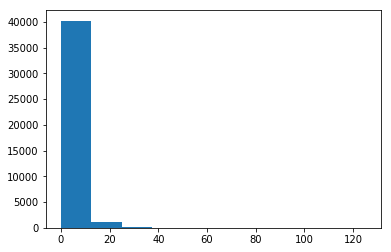

In [8]:
#Plot histogram of trips in first 30 days to check for outliers
plt.hist(df_ultimate['trips_in_first_30_days'])
plt.show()

In [18]:
#Check to see how many outliers we'd be removing
for trips in np.arange(40, 120, 20):
    num_of_trips = np.sum(df_ultimate['trips_in_first_30_days'] > trips)
    print('Number of trips over {}: {}'.format(trips, num_of_trips))

Number of trips over 40: 35
Number of trips over 60: 4
Number of trips over 80: 1
Number of trips over 100: 1


In [20]:
#Drop rows where users took over 60 trips in their first 30 days
df_ultimate = df_ultimate.drop(df_ultimate[df_ultimate['trips_in_first_30_days'] > 60].index)

#Check again
for trips in np.arange(40, 120, 20):
    num_of_trips = np.sum(df_ultimate['trips_in_first_30_days'] > trips)
    print('Number of trips over {}: {}'.format(trips, num_of_trips))

Number of trips over 40: 31
Number of trips over 60: 0
Number of trips over 80: 0
Number of trips over 100: 0


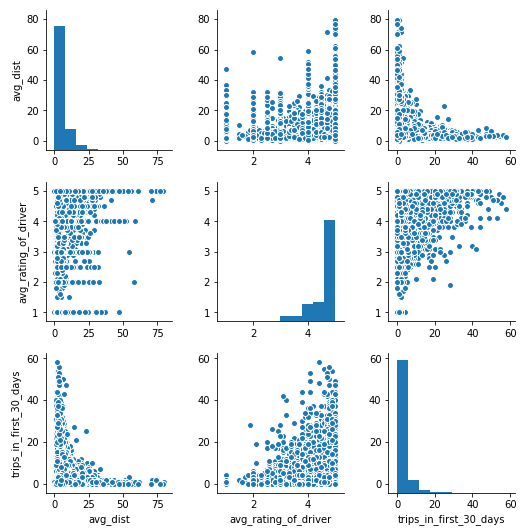

In [31]:
import seaborn as sns

columns_list = ['avg_dist', 'avg_rating_of_driver', 'trips_in_first_30_days']
df_visual = df_ultimate.loc[:, columns_list]
sns.pairplot(df_visual)
plt.show()

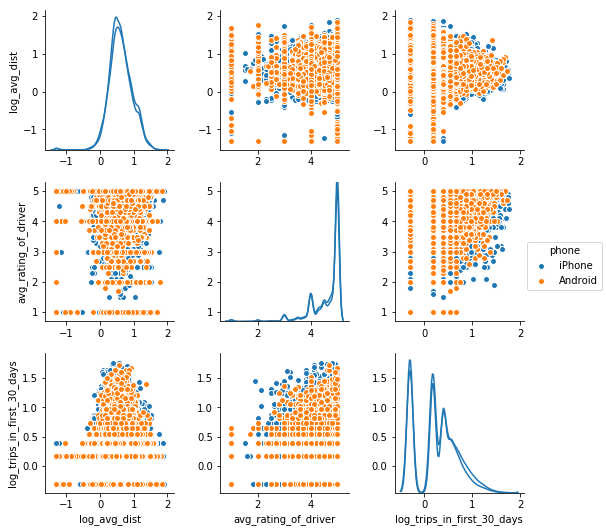

In [32]:
%matplotlib inline

#Take logs of right skewed data, adding a constant to remove 0 values
df_ultimate['log_avg_dist'] = np.log10(df_ultimate['avg_dist'] + 0.05)
df_ultimate['log_trips_in_first_30_days'] = np.log10(df_ultimate['trips_in_first_30_days'] + 0.5)

columns_list = ['log_avg_dist', 'avg_rating_of_driver', 'log_trips_in_first_30_days', 'phone', 'city']
df_visual = df_ultimate.loc[:, columns_list]
#Color code by phone
sns.pairplot(df_visual, hue='phone', diag_kind='kde')

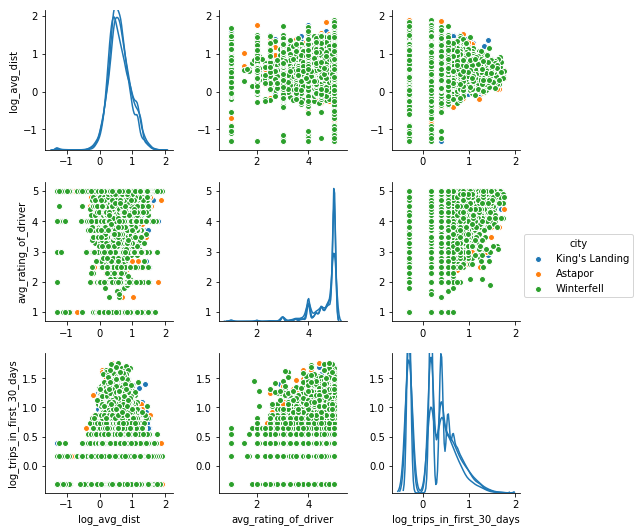

In [33]:
#Color code by city
sns.pairplot(df_visual, hue='city', diag_kind='kde')

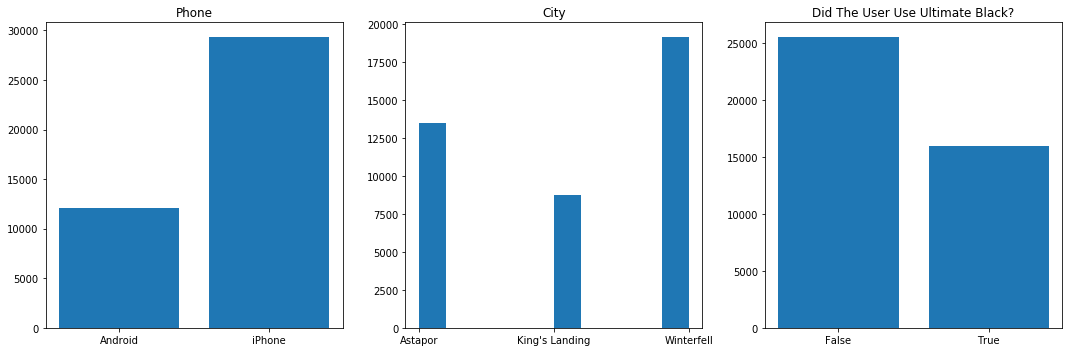

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('Phone')
plt.bar(['iPhone', 'Android'], [np.sum(df_ultimate['phone']=='iPhone'), np.sum(df_ultimate['phone'] == 'Android')])
plt.subplot(1, 3, 2)
plt.title('City')
plt.hist(df_ultimate['city'])
plt.subplot(1, 3, 3)
plt.title('Did The User Use Ultimate Black?')
plt.bar(['True', 'False'], [np.sum(df_ultimate['ultimate_black_user']), np.sum(df_ultimate['ultimate_black_user'] == 0)])
plt.tight_layout()
plt.show()

In [35]:
#Convert columns to dates
df_ultimate['signup_date'] = pd.to_datetime(df_ultimate['signup_date'])
df_ultimate['last_trip_date'] = pd.to_datetime(df_ultimate['last_trip_date'])

#Check last date
sorted(df_ultimate['last_trip_date'], reverse=True)[0]

Timestamp('2014-07-01 00:00:00')

In [36]:
#Create user_retained column if user took a trip in last 30 days
df_ultimate['user_retained'] = df_ultimate['last_trip_date'] > '2014-06-01'
np.sum(df_ultimate['user_retained']) / len(df_ultimate['user_retained'])

#Drop log transformed columns used for visualization
df_ultimate = df_ultimate.drop(['log_avg_dist', 'log_trips_in_first_30_days'], axis=1)

In [39]:
def categorical_bar_graph(df, column_name):
    
    cross_tab = pd.crosstab(df[column_name], df['user_retained'])

    num_categories = len(cross_tab.index)
    x_vals = np.arange(num_categories) + 1
    x_labels = cross_tab.index.values

    y_vals = np.empty(num_categories)
    for i in range(num_categories):
        y_vals[i] = cross_tab.iloc[i,1] / np.sum(cross_tab.iloc[i,0:2])
        
    return x_labels, x_vals, y_vals

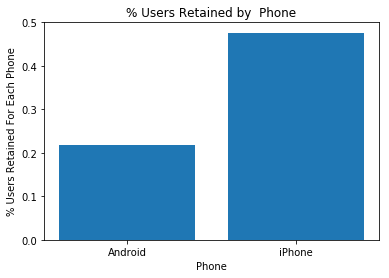

In [43]:
x_labels, x, y = categorical_bar_graph(df_ultimate, 'phone')

plt.bar(x, y)
plt.title('% Users Retained by Phone')
plt.xlabel('Phone')
plt.ylabel('% Users Retained For Each Phone')
plt.xticks(x, x_labels)
plt.show()

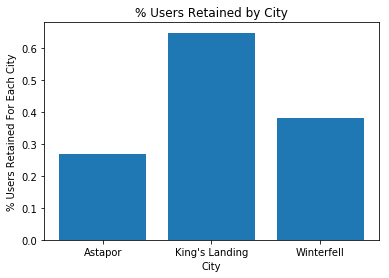

In [44]:
x_labels, x, y = categorical_bar_graph(df_ultimate, 'city')

plt.bar(x, y)
plt.title('% Users Retained by City')
plt.xlabel('City')
plt.ylabel('% Users Retained For Each City')
plt.xticks(x, x_labels)
plt.show()

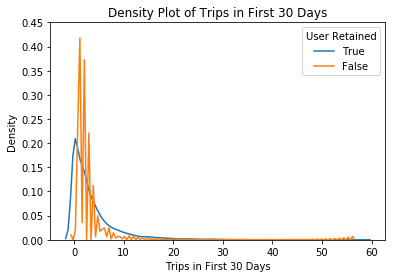

In [58]:
for category in df_ultimate['user_retained'].unique():
    subset = df_ultimate[df_ultimate['user_retained'] == category]
    
    sns.distplot(subset['trips_in_first_30_days'], hist=False, label=category)
    
plt.legend(title='User Retained')
plt.title('Density Plot of Trips in First 30 Days')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Density')
plt.ylim(0, 0.45)
plt.show()

In [27]:
#Drop independent variable column
dfx = df_ultimate.drop('user_retained', axis=1)

#Change signup date to days since first signup date
dfx['signup_delta'] = (df_ultimate['signup_date'] - df_ultimate['signup_date'].min())  / np.timedelta64(1,'D')

#Create dummy variables for categorical variables
dummy_city = pd.get_dummies(dfx['city'], drop_first=True)
dummy_phone = pd.get_dummies(dfx['phone'], drop_first=True)
dfx = pd.concat([dfx, dummy_city, dummy_phone], axis=1)

#Drop datetime and categorical columns
dfx = dfx.drop(['last_trip_date', 'signup_date', 'city', 'phone'], axis=1)
dfx.astype(float).head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_delta,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4.0,1.0,46.2,24.0,1.0,0.0,1.0
1,8.26,5.0,5.0,1.00,0.0,0.0,0.0,50.0,28.0,0.0,0.0,0.0
2,0.77,5.0,4.3,1.00,0.0,3.0,0.0,100.0,5.0,0.0,0.0,1.0
3,2.36,4.9,4.6,1.14,20.0,9.0,1.0,80.0,9.0,1.0,0.0,1.0
4,3.13,4.9,4.4,1.19,11.8,14.0,0.0,82.4,26.0,0.0,1.0,0.0


In [29]:
import statsmodels.formula.api as sm

#Create dependent and independet variables
X = dfx.astype(float)
y = df_ultimate['user_retained']

#Create and fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.561648
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              No. Iterations:     6.0000    
Dependent Variable:   user_retained      Pseudo R-squared:   0.166     
Date:                 2018-10-18 16:41   AIC:                46574.5275
No. Observations:     41441              BIC:                46678.1119
Df Model:             11                 Log-Likelihood:     -23275.   
Df Residuals:         41429              LL-Null:            -27902.   
Converged:            1.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
avg_dist               -0.0378   0.0025 -15.3580 0.0000 -0.0426 -0.0330
avg_rating_by_driver   -0.3059   0.0209 -14.6032 0.0000 -0.3469 -0.2648
avg_rating_of_driver   -0.0807   0.0168  -4.7933 0.0000 -0.1137 -0.0477
avg_surge              -0.4986   0.0858  -5.8109 0.0000 -0.6667 -0.3304
surge_pct               0.0064   0.0010   6.6353 0.0000  0.0045  0.0083
trips_in_first_30_days  0.1066   0.0035  30.4282 0.0000  0.0997  0.1135
ultimate_black_user     0.9388   0.0233  40.2700 0.0000  0.8931  0.9845
weekday_pct             0.0009   0.0003   2.7871 0.0053  0.0003  0.0016
signup_delta           -0.0060   0.0013  -4.6738 0.0000 -0.0085 -0.0035
King's Landing          1.7556   0.0325  54.0934 0.0000  1.6920  1.8193
Winterfell              0.5455   0.0264  20.6601 0.0000  0.4938  0.5973
iPhone                  1.1448   0.0268  42.6506 0.0000  1.0922  1.1974
=======================================================================

"""

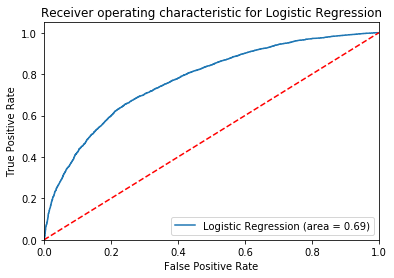

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

#Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Get predictions for our logistic regression model
y_pred = logreg.predict(X_test)

#Generate AUC score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

1. We found that three of our features have missing values. Since we have 50,000 data points, we can remove the rows with missing values without it having a drastic effect on our data. Using our describe function, we can see that our values make sense (ratings between 1 and 5, percentages between 0 and 100). There were some extreme values in the trips_in_first_30_days variable, and we removed the users with those extreme values to make it easier to visualize our data. We can also see that most of our numerical data lies on an extreme (most users averaged 0-10 miles per trip in their first 30 days, most drivers had an average rating of 4.5 to 5, etc.), but our categorical variables were more balanced. There also doesn't seem to be much correlation between our numeric variables. The city the user signed up in and the phone they used don't seem to have an effect on the numeric variables we inspected either, so we can include all these variables in our model. After doing some plotting, we see that the type of phone a user has and which city they signed up in does seem to affect user retention, with more iPhone users and users signing up in Kingsland staying with the company. We also found that about 40% of users were retained. 

2. I chose to go with a logistic regression model, because it is well suited to a binary classification problem and fairly interpretable. While models such as random forest and support vector machines are also well suited to classification problems, they are not as easy to interpret. The AUC score for our logistic regression model was 0.69, whose interpretation is context dependent and requires a baseline model or other models for comparison. 

3. Although all of our variables had low p-values, it  can be more useful to look at the magnitude of the coefficients. The large coefficients for our iPhone variable suggest that users who signed up using an iPhone are more likely to be retained. There might be something about the Android application that could be dissuading users from using it more, such as missing features or poor UI design. Signing up in King's Landing also seems to make it much more likely that a user will stick with Ultimate. The company could offer unique benefits to the users in Winterfell and Astapor to attract more users. 